In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

Inicializando el dataset


In [13]:
datos = pd.read_csv("assets/data/games.csv", index_col="Id")
print(datos.head())


                                      Title  Release Date  \
Id                                                          
0                                Elden Ring  Feb 25, 2022   
1                                     Hades  Dec 10, 2019   
2   The Legend of Zelda: Breath of the Wild  Mar 03, 2017   
3                                 Undertale  Sep 15, 2015   
4                             Hollow Knight  Feb 24, 2017   

                                                 Team  Rating Times Listed  \
Id                                                                           
0      ['Bandai Namco Entertainment', 'FromSoftware']     4.5         3.9K   
1                                ['Supergiant Games']     4.3         2.9K   
2   ['Nintendo', 'Nintendo EPD Production Group No...     4.4         4.3K   
3                                  ['tobyfox', '8-4']     4.2         3.5K   
4                                     ['Team Cherry']     4.4           3K   

   Number of Reviews     

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1512 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1512 non-null   object 
 1   Release Date       1512 non-null   object 
 2   Team               1511 non-null   object 
 3   Rating             1499 non-null   float64
 4   Times Listed       1512 non-null   object 
 5   Number of Reviews  1512 non-null   object 
 6   Genres             1512 non-null   object 
 7   Summary            1511 non-null   object 
 8   Reviews            1512 non-null   object 
 9   Plays              1512 non-null   object 
 10  Playing            1512 non-null   object 
 11  Backlogs           1512 non-null   object 
 12  Wishlist           1512 non-null   object 
dtypes: float64(1), object(12)
memory usage: 165.4+ KB


Mostrando las filas con datos nulos

In [6]:
datos.isnull().any()

Title                False
Release Date         False
Team                  True
Rating                True
Times Listed         False
Number of Reviews    False
Genres               False
Summary               True
Reviews              False
Plays                False
Playing              False
Backlogs             False
Wishlist             False
dtype: bool

Identificando las filas en especificas con datos nulos

In [7]:
#FILTRAR LAS FILAS QUE CONTIENEN VALORES NULOS
filas_nulas = datos[datos.isnull().any(axis=1)]
print(filas_nulas)

                                                  Title     Release Date  \
Id                                                                         
587                                   Final Fantasy XVI     Jun 22, 2023   
649                                   Death Stranding 2  releases on TBD   
713                           Final Fantasy VII Rebirth     Dec 31, 2023   
719                                           Lies of P     Aug 01, 2023   
726                                               Judas     Mar 31, 2025   
746   Like a Dragon Gaiden: The Man Who Erased His Name     Dec 31, 2023   
972           The Legend of Zelda: Tears of the Kingdom     May 12, 2023   
1130                           Star Wars Jedi: Survivor     Apr 28, 2023   
1160            We Love Katamari Reroll + Royal Reverie     Jun 02, 2023   
1202                                         Earthblade     Dec 31, 2024   
1245                               NEET Girl Date Night     Oct 21, 2022   
1305        

Eliminando los datos nulos del dataset

In [8]:
data_sin_nulos = datos.dropna() #Elimina filas nulas
data_sin_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1498 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1498 non-null   object 
 1   Release Date       1498 non-null   object 
 2   Team               1498 non-null   object 
 3   Rating             1498 non-null   float64
 4   Times Listed       1498 non-null   object 
 5   Number of Reviews  1498 non-null   object 
 6   Genres             1498 non-null   object 
 7   Summary            1498 non-null   object 
 8   Reviews            1498 non-null   object 
 9   Plays              1498 non-null   object 
 10  Playing            1498 non-null   object 
 11  Backlogs           1498 non-null   object 
 12  Wishlist           1498 non-null   object 
dtypes: float64(1), object(12)
memory usage: 163.8+ KB


Funcion para verificar si el genero rpg esta presente en el dataset

In [9]:
def filtro_rpg(genres):
    return 'RPG' in genres

#SE APLICA EL FILTRO USANDO APPLY
datosRPG = data_sin_nulos[data_sin_nulos['Genres'].apply(filtro_rpg)]

Transformacion de dataset: muestra 2 columnas de datos (solo juegos RPG)

In [10]:
nombresRPG = datosRPG[['Title', 'Rating']]
nombresRPG.head(10)

,Title,Rating
Id,,
0,Elden Ring,4.5
1,Hades,4.3
2,The Legend of Zelda: Breath of the Wild,4.4
3,Undertale,4.2
6,Omori,4.2
9,NieR: Automata,4.3
10,Persona 5 Royal,4.4
12,God of War,4.2
14,Bloodborne,4.5


In [11]:
nombresRPG.info()

<class 'pandas.core.frame.DataFrame'>
Index: 516 entries, 0 to 1510
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   516 non-null    object 
 1   Rating  516 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.1+ KB


Mostrando los primeros 20 videojuegos rating con su titulo correspondiente

Agregando las etiquetas de datos al grafico

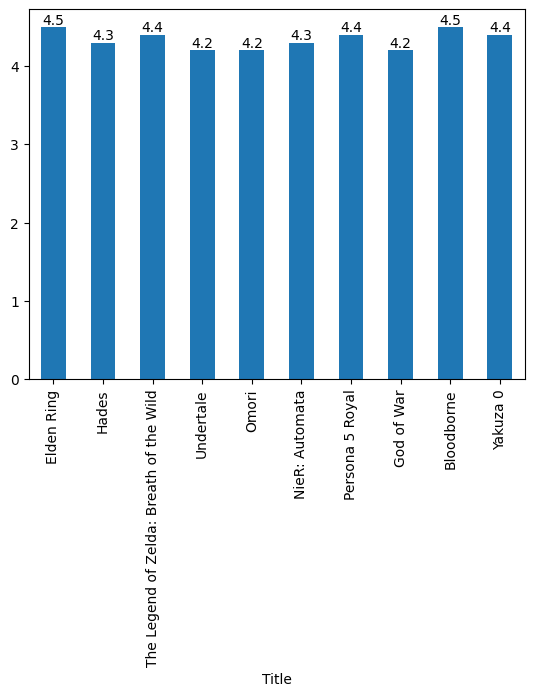

In [12]:
datasetRPG = nombresRPG.head(10)
datasetRPG.set_index('Title', inplace=True)

grafico = datasetRPG['Rating'].plot(kind='bar')

for i, rating in enumerate(datasetRPG['Rating']):
    grafico.annotate(str(rating), xy=(i, rating), ha='center', va='bottom')

plt.show()